# FC Farcelona - Footbal Manager

# Team:
| Name | Student Number | E-mail |
|------|----------------|--------|
| Mallika Tripathi  | 5691753 |  m.tripathi-2@student.tudelft.nl |
| Christian Vorage | 4667905 |  c.v.m.m.vorage@student.tudelft.nl |
| Petar Velchev | 4349253 |  p.velchev@student.tudelft.nl |
| Givani Boekestijn | 4710193 |  g.l.m.boekestijn@student.tudelft.nl |


## Downloading & Loading Data

In [ ]:
# Download json file with data from personal drive
# UPDATED FILE:  1LZEEQLm3QSQNwshJ3kGg_TSiQD03Ua5K
# ORIGINAL FILE: 1EPjLlaSk5no9X_lJL9BbEVERg2m43nMQ

!gdown 1LZEEQLm3QSQNwshJ3kGg_TSiQD03Ua5K

Downloading...
From: https://drive.google.com/uc?id=1LZEEQLm3QSQNwshJ3kGg_TSiQD03Ua5K
To: /content/project_4_data_v2.txt
100% 1.22M/1.22M [00:00<00:00, 136MB/s]


In [ ]:
import json
with open("/content/project_4_data_v2.txt", 'r') as handle:
     contents = json.loads(handle.read())

In [ ]:
# Create Player Class:
class Player:
  def __init__(self, player):
    self.name = player['name']
    self.position = player['position']
    self.history = []
    for i in player['history']:
      history_dict = {'age': i['age'],
                      'value': i['value'],
                      'date': i['date'],
                      'team': i['team']}
      self.history.append(history_dict)

## Visualizing Data

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def plot_player_overview(player):
  values_list = []
  dates_list = []
  age_list = []
  teams_list = []
  transfer_list = []
  last_club = player.history[0]['team']
  last_value = player.history[0]['value']
  last_date = datetime.strptime(player.history[0]['date'], '%b %d, %Y')

  for i in player.history:
    # Add items to lists
    values_list.append(i['value'])
    age_list.append(i['age'])
    dates_list.append(datetime.strptime(i['date'], '%b %d, %Y'))
    teams_list.append(i['team'])
    if last_club != i['team']:
      transfer = np.array([[last_date,  datetime.strptime(i['date'], '%b %d, %Y')],
                          [last_value,  i['value'] ],
                          [last_club,   i['team']]])
      transfer_list.append(transfer)
    # Save last parameters
    last_club = i['team']
    last_value = i['value']
    last_date = datetime.strptime(i['date'], '%b %d, %Y')

  # Create player plot:
  plt.figure(figsize=(14,6))
  plt.plot(dates_list,values_list)
  plt.scatter(dates_list, values_list, c=age_list, cmap='viridis')
  plt.text(x=15000, y=20000000, s=player.position, fontsize=20, bbox=dict(facecolor='red', alpha=0.2))
  legend_entry_list = ["Value over Time", "Age as color"]
  for transfer in transfer_list:
    plt.plot(transfer[0,:], transfer[1,:], '--', linewidth=3.0)
    legend_entry_list.append(f"Transfer: {transfer[2,0]} --> {transfer[2,1]}")
  plt.legend(legend_entry_list)
  plt.title(f"{player.name} Information")
  plt.xlabel("Year")
  plt.ylabel("Value in Euro's")
  clb=plt.colorbar()
  clb.ax.tick_params(labelsize=10)
  clb.ax.set_title('Age',fontsize=10)
  plt.savefig(f'{player.name}.png')
  plt.show()

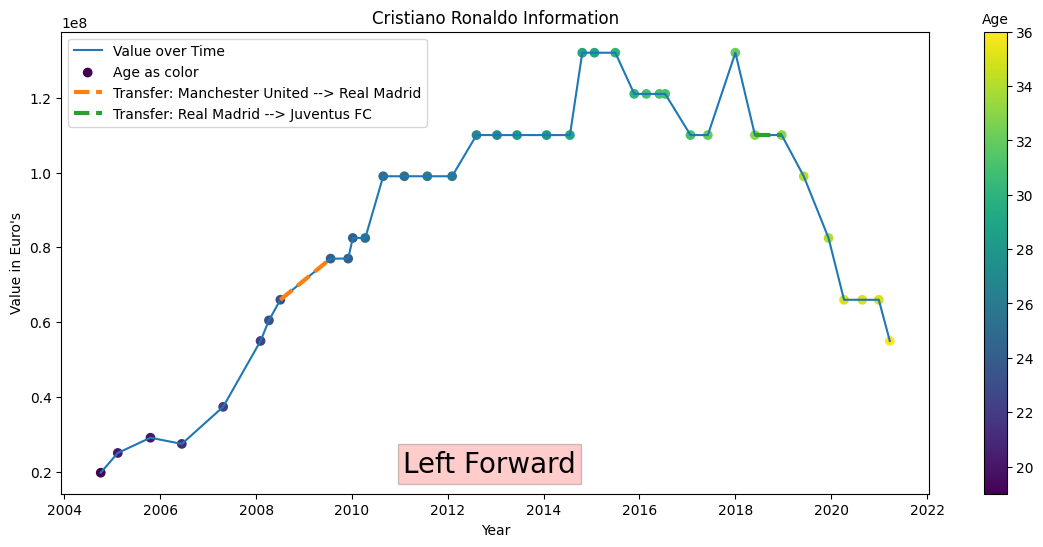

In [ ]:
#Mbappe:1, Cristiano:101, Frenkie:18, Messi:19
player = Player(contents[101])
plot_player_overview(player)

##  More Stuff

In [ ]:
# Use to inspect all players names:
# player_list = []
# i = 0
# for elem in contents:
#   print(elem['name']) #%% = Player(elem)
#   if elem['name'] == 'Cristiano Ronaldo':
#     print(i)
#   player_list.append(Player(elem))
#   i = i+1


## Problem Description

- Amount of roles: 10
- Amount of players for each role: 2
- Total amount of players: 20
- Time horizon: $T=8$ years
- Budget: $b_0>0$
- Final Value at time $T$: $b_T$

## Problem Insights

- Go back in time, from finish to start, and find the players for each position at least two, that showed the highest procential increase in value
- Devide the years into for example: events ∈ [last value in 2020, last value in 2021]
- We assume that budget constraint will be heavy enough that the highest procentual increase in value of players will be the optimal policy

## Create Events Database

In [ ]:
import pandas as pd
from IPython.display import display
year = 2020

def get_oppertunites_df(year, contents):
  counter = 0;
  # Create dataframe, specifically index size is very small
  df = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price', 'age'], index=[np.arange(0,5)])
  for i in contents:
    years = []
    values = []
    ages = []
    for ii in i['history']:
      years.append(datetime.strptime(ii['date'], '%b %d, %Y').year)
      values.append(ii['value'])
      ages.append(ii['age'])
    years.reverse()
    try:
      # Try to grab the data for the desired year for a player
      idx_start = len(years) -  years.index(year-1) - 1
      idx_end = len(years) -  years.index(year) - 1
    except:
      # If it doesn't exist skip player
      continue
    delta_price = values[idx_end] - values[idx_start]
    try:
      # Try to calculate the DPP, but forget about player if he didn't have a value last year
      delta_percentage_price = (values[idx_end] - values[idx_start]) / values[idx_start]
    except:
      continue
    df.loc[counter,['name','position','price_start','price_finish','delta_percentage_price','age']] = [i['name'], i['position'], values[idx_start], values[idx_end], delta_percentage_price, ages[idx_start]]
    counter = counter + 1;
  return df

opp_df = get_oppertunites_df(year, contents)
display(opp_df)

,name,position,price_start,price_finish,delta_percentage_price,age
0,Kylian Mbappé,Centre Forward,220000000,198000000,-0.1,20
1,Neymar,Left Forward,176000000,140800000,-0.2,27
2,Harry Kane,Centre Forward,165000000,132000000,-0.2,26
3,Erling Haaland,Centre Forward,49500000,110000000,1.222222,19
4,Mohamed Salah,Right Forward,165000000,132000000,-0.2,27
...,...,...,...,...,...,...
489,Hans Hateboer,Right Back,16500000,19800000,0.2,25
490,Nemanja Maksimovic,Centre Midfield,22000000,22000000,0.0,24
491,Issa Diop,Centre Back,38500000,22000000,-0.428571,22
492,Ayoze Pérez,Left Forward,33000000,22000000,-0.333333,26


In [ ]:
def get_best_opps(opp_df):
  pos_list = ['Left Forward', 'Centre Forward', 'Right Forward',
              'Left Midfield', 'Centre Midfield', 'Right Midfield',
              'Left Back', 'Centre Back', 'Right Back',
                                'Goalkeeper']
  best_opps = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price'], index=None)
  counter = 1
  for idx, pos in enumerate(pos_list):
    opp_df_pos = opp_df[opp_df['position'] == pos]
    opp_df_pos_ordered = opp_df_pos.sort_values(by=['delta_percentage_price'], ascending=False)
    best_opp = opp_df_pos_ordered.iloc[:2]
    if idx == 0:
      # Do not append
      continue
    else:
      # best_opps = best_opps.append(best_opp)
      best_opps = pd.concat([best_opps, best_opp])

  return best_opps

best_opps_df = get_best_opps(opp_df)
display(best_opps_df)

,name,position,price_start,price_finish,delta_percentage_price,age
"(156,)",Pedro Neto,Left Forward,7700000,29700000,2.857143,19
"(357,)",Saïd Benrahma,Left Forward,8800000,24200000,1.75,23
"(298,)",Daniel Podence,Right Forward,6600000,27500000,3.166667,24
"(265,)",Gabriel Veron,Right Forward,7700000,27500000,2.571429,17
"(132,)",Tomas Soucek,Left Midfield,11000000,33000000,2.0,24
"(170,)",Manuel Locatelli,Left Midfield,14300000,38500000,1.692308,21
"(155,)",Jude Bellingham,Centre Midfield,2750000,29700000,9.8,16
"(213,)",Curtis Jones,Centre Midfield,2200000,18700000,7.5,18
"(353,)",Christoph Baumgartner,Right Midfield,2200000,19800000,8.0,20
"(407,)",Matteo Pessina,Right Midfield,3300000,16500000,4.0,22


In [ ]:
from tqdm import tqdm
year_range = np.arange(2011,2021)

def get_best_policy(contents,year_range):
  year_list = np.flip(year_range)
  policy = list()
  for year in tqdm(year_list):
    opps_df = get_oppertunites_df(year, contents)
    best_opps_df = get_best_opps(opps_df)
    policy.append(best_opps_df)
  policy.reverse()
  return policy

opt_policy = get_best_policy(contents, year_range)


100%|██████████| 10/10 [00:14<00:00,  1.43s/it]


In [ ]:
print(opt_policy[0])


                          name         position price_start price_finish  \
(4,)             Heung-min Son     Left Forward     1650000      4950000   
(17,)          Lorenzo Insigne     Left Forward      302500       660000   
(1,)             Mohamed Salah    Right Forward       27500       330000   
(48,)              Lucas Moura    Right Forward     1980000     11000000   
(8,)                  Casemiro    Left Midfield     1100000      8250000   
(58,)             Granit Xhaka    Left Midfield      440000      2750000   
(62,)  Alex Oxlade-Chamberlain  Centre Midfield      275000      6600000   
(59,)         Jordan Henderson  Centre Midfield     4400000     14300000   
(27,)        Christian Eriksen   Right Midfield     3300000      9900000   
(34,)          James Rodríguez   Right Midfield     4950000     10670000   
(37,)              Alex Sandro        Left Back     1320000      7480000   
(44,)       Nicolás Tagliafico        Left Back       55000       110000   
(14,)       

### Policy: Maximize Rate of Return

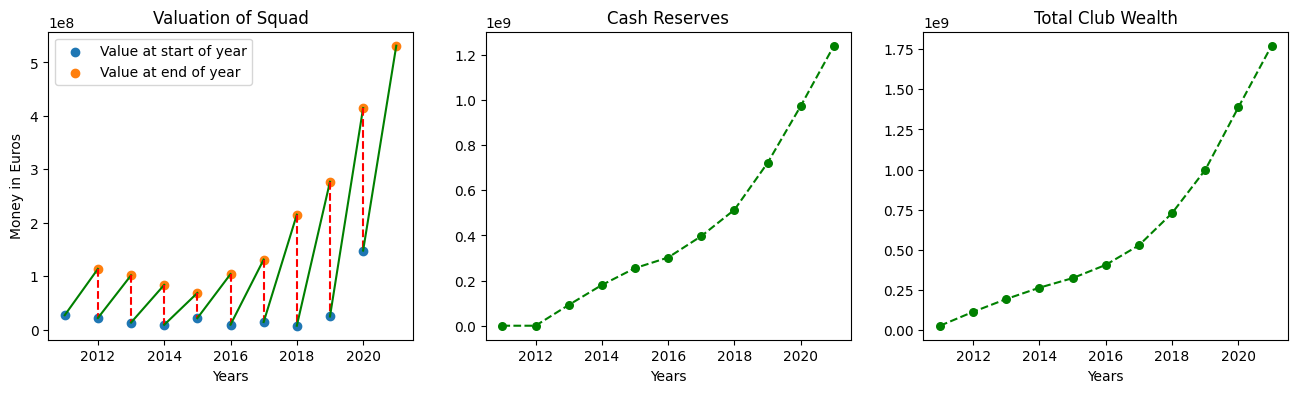

In [ ]:
def plot_policy(policy):
  ### Find initial budget needed for this policy:
  values = np.zeros((len(policy),2))
  balance = np.zeros((len(policy)))
  for idx, yearly_policy in enumerate(policy):
    values[idx,0] = sum(yearly_policy['price_start'])
    values[idx,1] = sum(yearly_policy['price_finish'])

  for i in range(len(balance)):
    if i == 0:
      balance[i] = 0
    elif 1<=i<=9:
      balance[i] = balance[i-1] + values[i-1,1] - values[i,0]
    else:
      balance[i] = balance[i-1] + values[i-1,1]

  player_values_start = []
  player_values_end = []
  player_dates_start = []
  player_dates_end = []
  for idx, year in enumerate(year_range):
    player_values_start.append(values[idx,0])
    player_dates_start.append(year)
    player_values_end.append(values[idx,1])
    player_dates_end.append(year+1)

  import matplotlib.pyplot as plt
  plt.figure(figsize=(16,4))
  plt.subplot(1, 3, 1)
  plt.scatter(player_dates_start, player_values_start)
  plt.scatter(player_dates_end, player_values_end)
  for i in range(len(year_range)):
    plt.plot( [player_dates_start[i], player_dates_end[i]], [player_values_start[i], player_values_end[i]], 'g-')
    if i==9:
      continue
    plt.plot( [player_dates_end[i], player_dates_start[i+1]], [player_values_end[i], player_values_start[i+1]], 'r--')
  plt.legend(["Value at start of year", "Value at end of year"])
  plt.title("Valuation of Squad")
  plt.ylabel('Money in Euros')
  plt.xlabel('Years')

  cash_reserves = np.append(balance[0], balance)

  plt.subplot(1, 3, 2)
  plt.title("Cash Reserves")
  plt.scatter(np.append(year_range, year_range[-1]+1), cash_reserves, 30,'g')
  plt.plot(np.append(year_range, year_range[-1]+1), cash_reserves, 'g--')
  plt.xlabel('Years')

  club_wealth = cash_reserves + np.append(player_values_start[0],player_values_end)

  plt.subplot(1, 3, 3)
  plt.title("Total Club Wealth")
  plt.xlabel('Years')
  plt.scatter(np.append(year_range, year_range[-1]+1), club_wealth , 30, 'g')
  plt.plot(np.append(year_range, year_range[-1]+1), club_wealth , 'g--')
  plt.show()

  return balance, player_values_start, player_values_end, club_wealth

opt_balance, opt_player_values_start, opt_player_values_end, opt_club_wealth = plot_policy(opt_policy)

In [ ]:
def calculate_CAGR(club_wealth, player_values_start):
  b_T = club_wealth[-1]
  b_0 = player_values_start[0]
  r = (b_T/b_0)**(1/10)
  return r

def show_CAGR(club_wealth, player_values_start, policy_name):
  b_T = club_wealth[-1]
  b_0 = player_values_start[0]
  r = (b_T/b_0)**(1/10)
  print(f"CAGR of {policy_name}:", r)
  return r

def calculate_average_RoR(policy, policy_name, print_bool):
  means_per_timestep = []
  for i in range(len(policy)):
    means_per_timestep.append(np.mean(policy[i]["delta_percentage_price"]))
  avg_RoR = np.mean(means_per_timestep)
  if print_bool == True:
      print(f"Average RoR of {policy_name}:", avg_RoR)
  return avg_RoR

r = show_CAGR(opt_club_wealth, opt_player_values_start, "Omniscient Optimal Policy")
r = calculate_average_RoR(opt_policy, "Omniscient Optimal Policy", True)

CAGR of Omniscient Optimal Policy: 1.5196418258048983
Average RoR of Omniscient Optimal Policy: 22.58729204437538


## Policy 1: Maximize on previous delta_percentage_price


In [ ]:
opps_df = {}
best_opps_df = {}
pol1_list = []
idx = 0
for year in tqdm(year_range):
  opps_df[idx] = get_oppertunites_df(year, contents)
  best_opps_df[idx] = get_best_opps(opps_df[idx])
  if idx > 0:
    # Create local copies of Dataframe, take previous best players for policy
    local_opps_df = opps_df[idx]
    local_best_opps_df = best_opps_df[idx-1]
    pol1_list.append(local_opps_df[local_opps_df['name'].isin( local_best_opps_df['name'])] )
  else:
    # dummy_df = local_opps_df[local_opps_df['name'].isin( local_best_opps_df['name'])]
    # dummy_df['price_start'].values[:] = 0
    # dummy_df['price_finish'].values[:] = 0
    # dummy_df['delta_percentage_price'].values[:] = 0
    # pol1_list.append(dummy_df)
    pos_list = ['Left Forward', 'Centre Forward', 'Right Forward',
            'Left Midfield', 'Centre Midfield', 'Right Midfield',
            'Left Back', 'Centre Back', 'Right Back',
                              'Goalkeeper']
    random_df = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price'], index=None)
    for pos in pos_list:
      local_opps_df = opps_df[idx]
      opp_df_pos = local_opps_df[local_opps_df['position'] == pos]
      random_2_players_for_pos = opp_df_pos.sample(n=2)
      random_df = pd.concat([random_df, random_2_players_for_pos])
    pol1_list.append(random_df)
  idx += 1


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


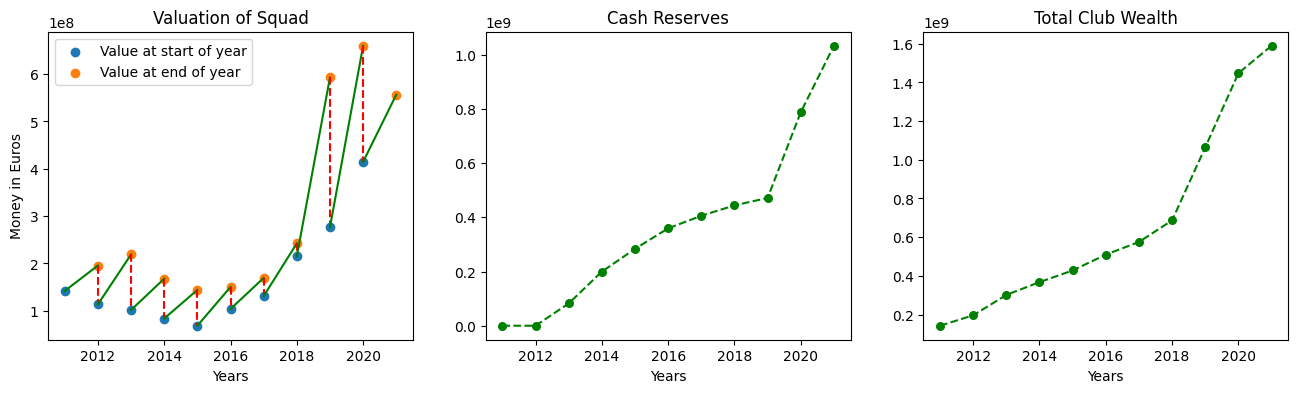

In [ ]:
pol1_balance, pol1_player_values_start, pol1_player_values_end, pol1_club_wealth = plot_policy(pol1_list)

In [ ]:
r = calculate_average_RoR(pol1_list, "Policy #1", True)

Average RoR of Policy #1: 1.7909552234547939


## Policy 2: Random Walk

In [ ]:
def random_walk(year, contents):
  opps_df = {}
  pol2_list = []
  idx = 0
  cash_balance = 0
  previous_random_df = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price'], index=None)
  for year in tqdm(year_range):
    opps_df[idx] = get_oppertunites_df(year, contents)
    pos_list = ['Left Forward', 'Centre Forward', 'Right Forward',
            'Left Midfield', 'Centre Midfield', 'Right Midfield',
            'Left Back', 'Centre Back', 'Right Back',
                              'Goalkeeper']
    too_expensive = True
    while too_expensive:
      random_df = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price'], index=None)
      for pos in pos_list:
        local_opps_df = opps_df[idx]
        opp_df_pos = local_opps_df[local_opps_df['position'] == pos]
        random_2_players_for_pos = opp_df_pos.sample(n=2)
        random_df = pd.concat([random_df, random_2_players_for_pos])

      purchase_price = sum(random_df['price_start'])
      if purchase_price < cash_balance or idx==0:
        cash_balance = cash_balance + sum(random_df['price_finish']) - sum(previous_random_df['price_start'])
        previous_random_df = random_df
        too_expensive = False

    pol2_list.append(random_df)
    idx += 1
  return pol2_list

pol2_list = random_walk(year, contents)

100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


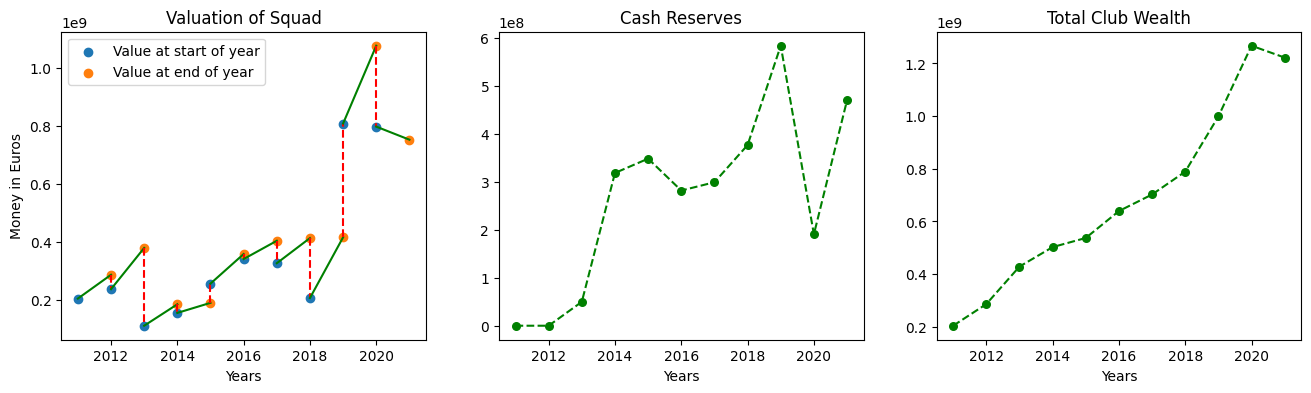

In [ ]:
pol2_balance, pol2_player_values_start, pol2_player_values_end, pol2_club_wealth = plot_policy(pol2_list)

In [ ]:
def get_club_wealth_from_policy(pol):
  values = np.zeros((len(pol),2))
  balance = np.zeros((len(pol)))
  for idx, yearly_policy in enumerate(pol):
    values[idx,0] = sum(yearly_policy['price_start'])
    values[idx,1] = sum(yearly_policy['price_finish'])

  for i in range(len(balance)):
    if i == 0:
      balance[i] = 0
    elif 1<=i<=9:
      balance[i] = balance[i-1] + values[i-1,1] - values[i,0]
    else:
      balance[i] = balance[i-1] + values[i-1,1]

  player_values_start = []
  player_values_end = []
  player_dates_start = []
  player_dates_end = []
  for idx, year in enumerate(year_range):
    player_values_start.append(values[idx,0])
    player_dates_start.append(year)
    player_values_end.append(values[idx,1])
    player_dates_end.append(year+1)

  cash_reserves = np.append(balance[0], balance)
  club_wealth = cash_reserves + np.append(player_values_start[0],player_values_end)
  r = calculate_average_RoR(pol, "Random Walk", False)
  return club_wealth, r

In [ ]:
from IPython.display import clear_output
N = 100
club_wealths = np.zeros((N,11))
RoRs = np.zeros((N))
for i in range(N):
  pol = random_walk(year, contents)
  club_wealths[i,:], RoRs[i] = get_club_wealth_from_policy(pol)
  clear_output(wait=True)
  print(f"Currently at policy {i+1}")

Currently at policy 100


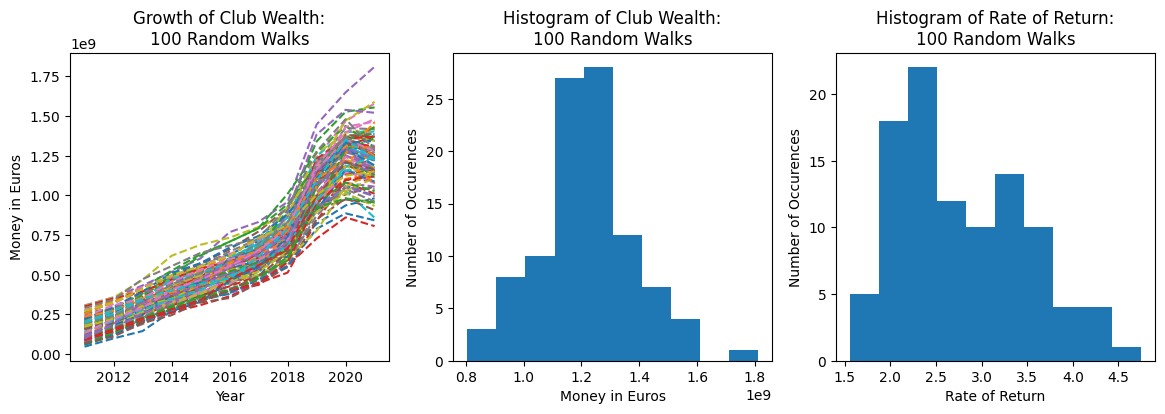

In [ ]:
# Plot Results of Random Walks
fig = plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(np.append(year_range, year_range[-1]+1), club_wealths.T, '--')
plt.title(f"Growth of Club Wealth:" "\n" "100 Random Walks")
plt.xlabel('Year')
plt.ylabel('Money in Euros')
plt.subplot(1,3,2)
plt.hist(club_wealths[:,-1].T)
plt.ylabel('Number of Occurences')
plt.xlabel('Money in Euros')
plt.title(f"Histogram of Club Wealth:" "\n" "100 Random Walks")
plt.subplot(1,3,3)
plt.hist(RoRs)
plt.ylabel('Number of Occurences')
plt.xlabel('Rate of Return')
plt.title("Histogram of Rate of Return:" "\n" "100 Random Walks")
plt.show()

# Policy 3: Pick the Youngest Players

In [ ]:
def get_youngest_opps(opp_df):
  pos_list = ['Left Forward', 'Centre Forward', 'Right Forward',
              'Left Midfield', 'Centre Midfield', 'Right Midfield',
              'Left Back', 'Centre Back', 'Right Back',
                                'Goalkeeper']
  youngest_opps = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price', 'age'], index=None)
  counter = 1
  for idx, pos in enumerate(pos_list):
    opp_df_pos = opp_df[opp_df['position'] == pos]
    opp_df_pos_ordered = opp_df_pos.sort_values(by=['age'], ascending=True)
    youngest_opp = opp_df_pos_ordered.iloc[:2]
    if idx == 1:
      # Do not append
      continue
    else:
      youngest_opps = pd.concat([youngest_opps, youngest_opp])
  return youngest_opps

opps_df = {}
best_opps_df = {}
pol3_list = []
idx = 0
for year in tqdm(year_range):
  opps_df[idx] = get_oppertunites_df(year, contents)
  best_opps_df[idx] = get_youngest_opps(opps_df[idx])
  if idx > 0:
    # Create local copies of Dataframe, take previous best players for policy
    local_opps_df = opps_df[idx]
    local_best_opps_df = best_opps_df[idx-1]
    pol3_list.append(local_opps_df[local_opps_df['name'].isin( local_best_opps_df['name'])] )
  else:
    pos_list = ['Left Forward', 'Centre Forward', 'Right Forward',
            'Left Midfield', 'Centre Midfield', 'Right Midfield',
            'Left Back', 'Centre Back', 'Right Back',
                              'Goalkeeper']
    random_df = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price'], index=None)
    for pos in pos_list:
      local_opps_df = opps_df[idx]
      opp_df_pos = local_opps_df[local_opps_df['position'] == pos]
      random_2_players_for_pos = opp_df_pos.sample(n=2)
      random_df = pd.concat([random_df, random_2_players_for_pos])
    pol3_list.append(random_df)
  idx += 1

100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


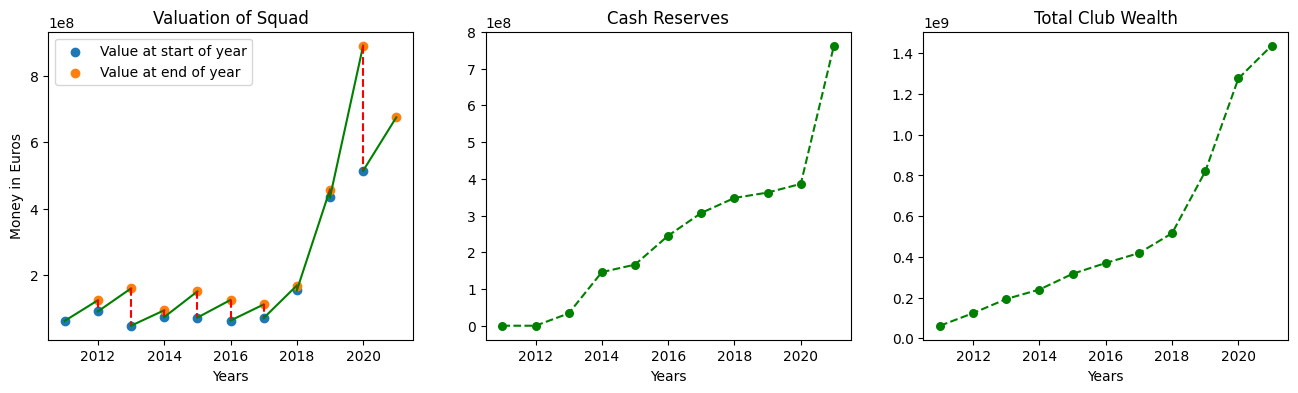

Average RoR of Policy #3: 4.762201007348679


In [ ]:
pol3_balance, pol3_player_values_start, pol3_player_values_end, pol3_club_wealth = plot_policy(pol3_list)
r = calculate_average_RoR(pol3_list, "Policy #3", True)

In [ ]:
pol3_list[9]


,name,position,price_start,price_finish,delta_percentage_price,age
"(155,)",Steven Bergwijn,Left Forward,110000,440000,3.0,16
"(68,)",Diogo Jota,Left Forward,110000,770000,6.0,17
"(25,)",Federico Chiesa,Right Forward,55000,82500,0.5,16
"(217,)",Cengiz Ünder,Right Forward,55000,1320000,23.0,17
"(91,)",Manuel Locatelli,Left Midfield,82500,165000,1.0,16
"(48,)",Rúben Neves,Left Midfield,2200000,6600000,2.0,17
"(27,)",Nicolò Barella,Centre Midfield,220000,880000,3.0,17
"(199,)",Gaetano Castrovilli,Centre Midfield,55000,275000,4.0,17
"(70,)",Martin Ødegaard,Right Midfield,4400000,4400000,0.0,15
"(124,)",Nikola Vlasic,Right Midfield,825000,3850000,3.666667,16
